# DopeSlopes & FaveWaves - A Funnel Analysis

This is my first funnel analysis and first time using predictive modelling. 
Feedback is warmly welcomed, for ways to make a more rigerous analysis and skills for the future.

##### Disclaimer 
- Data set found on Kaggle.com and is not associated with a real company.
- The data was given a context by the analyst (myself).
- DopeSlopes & FaveWaves is a fictitious business. Any resemblance to an actual business, active or not, is purely coincidental.
- This is a Hyper Island student project. We were given 1 week to perform the analysis and maximum of 5 slides for the presentation. 


### The Task
"You are the growth analyst for an e-commerce site. The company CEO isn't very happy with the volume of sales and, especially, of sales coming from new users. Therefore, she asked you to investigate whether there is something wrong in the conversion funnel or, in general, if you could suggest how conversion rate can be improved.

Deliverables: 
A short presentation of your funnel analysis, key findings  & recommendations that you will present to your CEO of how the conversion rate can be improved."

### The Company - DopeSlopes & FaveWaves

DopeSlopes & FaveWaves sells winter and summer sports equipment. All the stuff you need for looking and performing your best when you are hitting the ski slopes and surfer waves.

Previously a successful offline store, they launched a online e-commerce store January 2015. After 4 months of poor performance, a Data Analyst is called in to figure out what is not working well and what can be done to improve conversion from visiting the site to purchasing products. 

With 90400 visitors to their site they had no more than 452 sales.

### The resulting presentation
See the analysis presentation here: <a href="https://docs.google.com/presentation/d/1oebICvcpuwr-sSCKwerfBfu_sY6QABs4Iwtk2MIksVI/edit#slide=id.gba2a044ee7_2_68">Presentation slides</a>.

### The Funnel
1. Home page
2. Search
3. Basket
4. Payment Confirmation (Purchase)



## Let's Go!

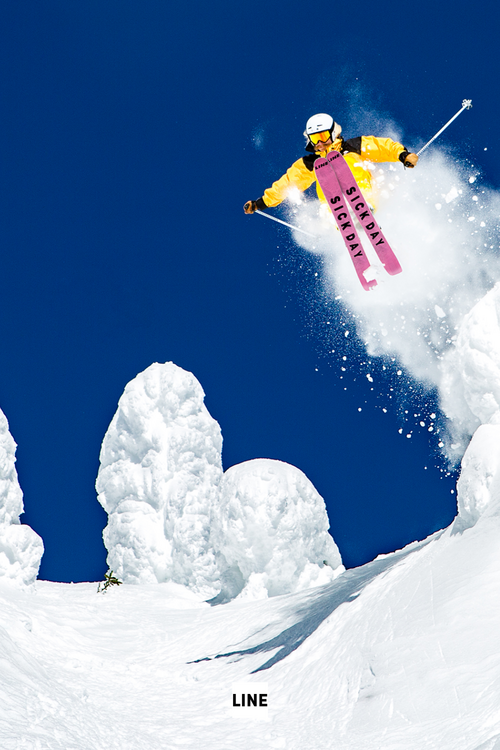

## The Set Up

In [2]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
#Import the datasets into DataFrames
df_home=pd.read_csv('home_page_table.csv')
df_search =pd.read_csv('search_page_table.csv')
df_payment=pd.read_csv('payment_page_table.csv')
df_confirmation=pd.read_csv('payment_confirmation_table.csv')
df_user = pd.read_csv('user_table.csv')

In [336]:
#Counting number of rows per tables to ensure that each user have gone through all the steps and are not lost in a left merge
print("Home Page: " + str(len(df_home)))
print("Search Page: " + str(len(df_search)))
print("Payment Page: " + str(len(df_payment)))
print("Confirmation Page: " + str(len(df_confirmation)))
print("User Page: " + str(len(df_user)))

Home Page: 90400
Search Page: 45200
Payment Page: 6030
Confirmation Page: 452
User Page: 90400


In [174]:
#Merge tables into one table on User_Id
funnel= pd.merge(df_user, df_home, how="left", on=["user_id", "user_id"])
funnel= pd.merge(funnel, df_search, how="left", on=["user_id", "user_id"],suffixes=("_home", "_search"))
funnel= pd.merge(funnel, df_payment, how="left", on=["user_id", "user_id"])
funnel= pd.merge(funnel, df_confirmation, how="left", on=["user_id", "user_id"], suffixes=("_basket", "_confirmation"))
funnel

,user_id,date,device,sex,page_home,page_search,page_basket,page_confirmation
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
90395,307667,2015-03-30,Desktop,Female,home_page,NaN,NaN,NaN
90396,642989,2015-02-08,Desktop,Female,home_page,search_page,NaN,NaN
90397,659645,2015-04-13,Desktop,Male,home_page,search_page,NaN,NaN
90398,359779,2015-03-23,Desktop,Male,home_page,NaN,NaN,NaN


In [175]:
#Transcribe the page visit to 1 = True (Is not null) and 0 = False (Is null)
funnel['page_home']=funnel['page_home'].apply(lambda x: 1 if not pd.isnull(x) else 0)
funnel['page_search']=funnel.page_search.apply(lambda x: 1 if not pd.isnull(x) else 0)
funnel['page_basket']=funnel.page_basket.apply(lambda x: 1 if not pd.isnull(x) else 0)
funnel['page_confirmation']=funnel.page_confirmation.apply(lambda x: 1 if not pd.isnull(x) else 0)

In [176]:
#Creating a column to state last page aka. the page where the user bounced.
for index, row in funnel.iterrows():
    if row.page_confirmation==1:
        funnel.loc[index, 'last_page']='Confirmation'
    elif row.page_basket==1:
        funnel.loc[index, 'last_page']='Basket'
    elif row.page_search==1:
        funnel.loc[index, 'last_page']='Search'
    else:
        funnel.loc[index, 'last_page']='Home'

In [177]:
#Checking the resulting table
funnel.head()

,user_id,date,device,sex,page_home,page_search,page_basket,page_confirmation,last_page
0,450007,2015-02-28,Desktop,Female,1,0,0,0,Home
1,756838,2015-01-13,Desktop,Male,1,0,0,0,Home
2,568983,2015-04-09,Desktop,Male,1,1,0,0,Search
3,190794,2015-02-18,Desktop,Female,1,1,0,0,Search
4,537909,2015-01-15,Desktop,Male,1,0,0,0,Home


In [310]:
#Ensuring all the User_Ids and rows are intact
funnel.user_id.nunique()

90400

##  EDA - Plot the information

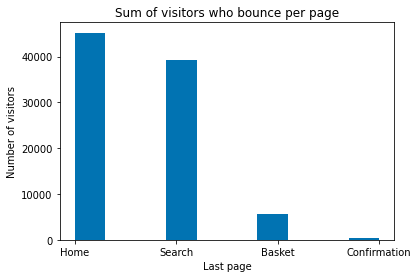

In [309]:
#First visualization of the funnel
plt.hist(funnel.last_page)

plt.title('Sum of visitors who bounce per page')
plt.ylabel('Number of visitors')
plt.xlabel('Last page');

It is clear that in the step between search and basket the site looses alot of visitors. Let's see if there is a visabile difference between the other factors such as Sex and Device

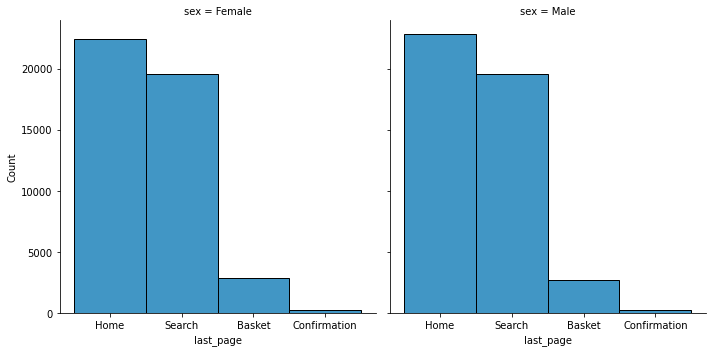

In [341]:
#Check for differences in bounce between sex (Female, Male)
sns.displot(data=funnel, x='last_page', col='sex');

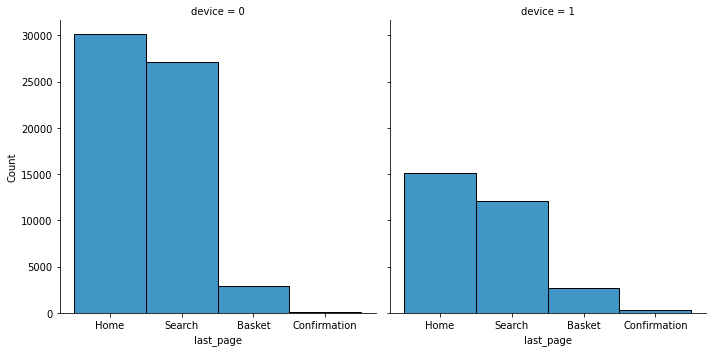

In [342]:
#Check for differences in bounce between devices (Desktop and Mobile)
sns.displot(data=funnel, x='last_page', col='device');

From these graphs we see that there is no visable difference between female and male in the behavior on the website, on the other hand it seems to be worth while to continue exploring differences between the desktop and mobile websites.

### Conversion rates
Calculating the rate of conversion, both between steps in the funnel and overall rate from coming to the site to reaching respective steps. 

In [182]:
#Calculating proportion of converstion between each step of the funnel
rate = {'Stage':['Home','Search','Basket','Purchase', 'Over all conversion'], 'Number of visiters':[funnel.page_home.sum(), funnel.page_search.sum(),funnel.page_basket.sum(),funnel.page_confirmation.sum(), 'NaN'],'Conversion Rate': [1, funnel.page_search.sum()/funnel.page_home.sum(),funnel.page_basket.sum()/funnel.page_search.sum(),funnel.page_confirmation.sum()/funnel.page_basket.sum(),funnel.page_confirmation.sum()/funnel.page_home.sum(),]}

In [183]:
#Calculating proportion of converstion between each step of the funnel and the home page (Total visitors)
rate_prp = {'Stage':['Home','Search','Basket','Purchase', 'Over all conversion'], 'Number of visiters':[funnel.page_home.sum(), funnel.page_search.sum(),funnel.page_basket.sum(),funnel.page_confirmation.sum(), 'NaN'],'Conversion Rate': [1, 
funnel.page_search.sum()/funnel.page_home.sum(),
funnel.page_basket.sum()/funnel.page_home.sum(),
funnel.page_confirmation.sum()/funnel.page_home.sum(),
'NaN']}
rate_prp

{'Stage': ['Home', 'Search', 'Basket', 'Purchase', 'Over all conversion'],
 'Number of visiters': [90400, 45200, 6030, 452, 'NaN'],
 'Conversion Rate': [1, 0.5, 0.06670353982300885, 0.005, 'NaN']}

In [184]:
#Creating a new dataframe
df_rate = pd.DataFrame(data=rate)

In [185]:
#Adding the information into the dataframe
df_rate['Conversion Rate']=round(df_rate['Conversion Rate']*100,2)
df_rate['Overall Rate']=rate_prp['Conversion Rate']
df_rate

,Stage,Number of visiters,Conversion Rate,Overall Rate
0,Home,90400,100.00,1
1,Search,45200,50.00,0.5
2,Basket,6030,13.34,0.066704
3,Purchase,452,7.50,0.005
4,Over all conversion,NaN,0.50,NaN


## EDA - Visualize the development over time

Ok, we now have a sense of the funnel and we seen that there may be a difference of behavior between the devices that is worth exploring further. 

But first, lets get a sense of what happened during the past 4 months. (Assuming it is now May 2015)

In [300]:
#Chacking date into datetime datatype and assigning each entry to a week number.
funnel['date']=pd.to_datetime(funnel.date)
funnel['week'] = funnel['date'].dt.isocalendar().week

In [187]:
#Creating a new data frame with information grouped by week.
funnel_week=funnel.groupby('week').sum().reset_index()

In [188]:
#Controlling the result
funnel_week.head()

,week,user_id,page_home,page_search,page_basket,page_confirmation
0,1,1487591059,2906,1752,300,25
1,2,2537315688,5087,3021,506,47
2,3,2486829260,5037,3050,523,35
3,4,2574859408,5221,3088,596,49
4,5,2562494836,5177,3162,558,40


In [301]:
#See the weeks that it ranges between.
funnel_week.week.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18], dtype=int64)

In [189]:
#Dropping the user ID colunm as it no longer holds a purpose.
funnel_week.drop(columns='user_id', inplace=True)

In [337]:
#Calculating, the proportions between each step in the funnel
funnel_week['purchase_per_visitor']=funnel_week.page_confirmation/funnel_week.page_home
funnel_week['search_per_visits']=funnel_week.page_search/funnel_week.page_home
funnel_week['baskets_per_search']=funnel_week.page_basket/funnel_week.page_search
funnel_week['purchase_per_basket']=funnel_week.page_confirmation/funnel_week.page_basket
funnel_week.head()

,week,page_home,page_search,page_basket,page_confirmation,purchase_per_visitor,search_per_visits,baskets_per_search,purchase_per_basket
0,1,2906,1752,300,25,0.008603,0.602891,0.171233,0.083333
1,2,5087,3021,506,47,0.009239,0.593867,0.167494,0.092885
2,3,5037,3050,523,35,0.006949,0.605519,0.171475,0.066922
3,4,5221,3088,596,49,0.009385,0.591458,0.193005,0.082215
4,5,5177,3162,558,40,0.007726,0.610778,0.176471,0.071685


In [191]:
#Creating a list for the months to use on the X Axis in the coming graphs.
xlist=list(['January','February','March','April'])

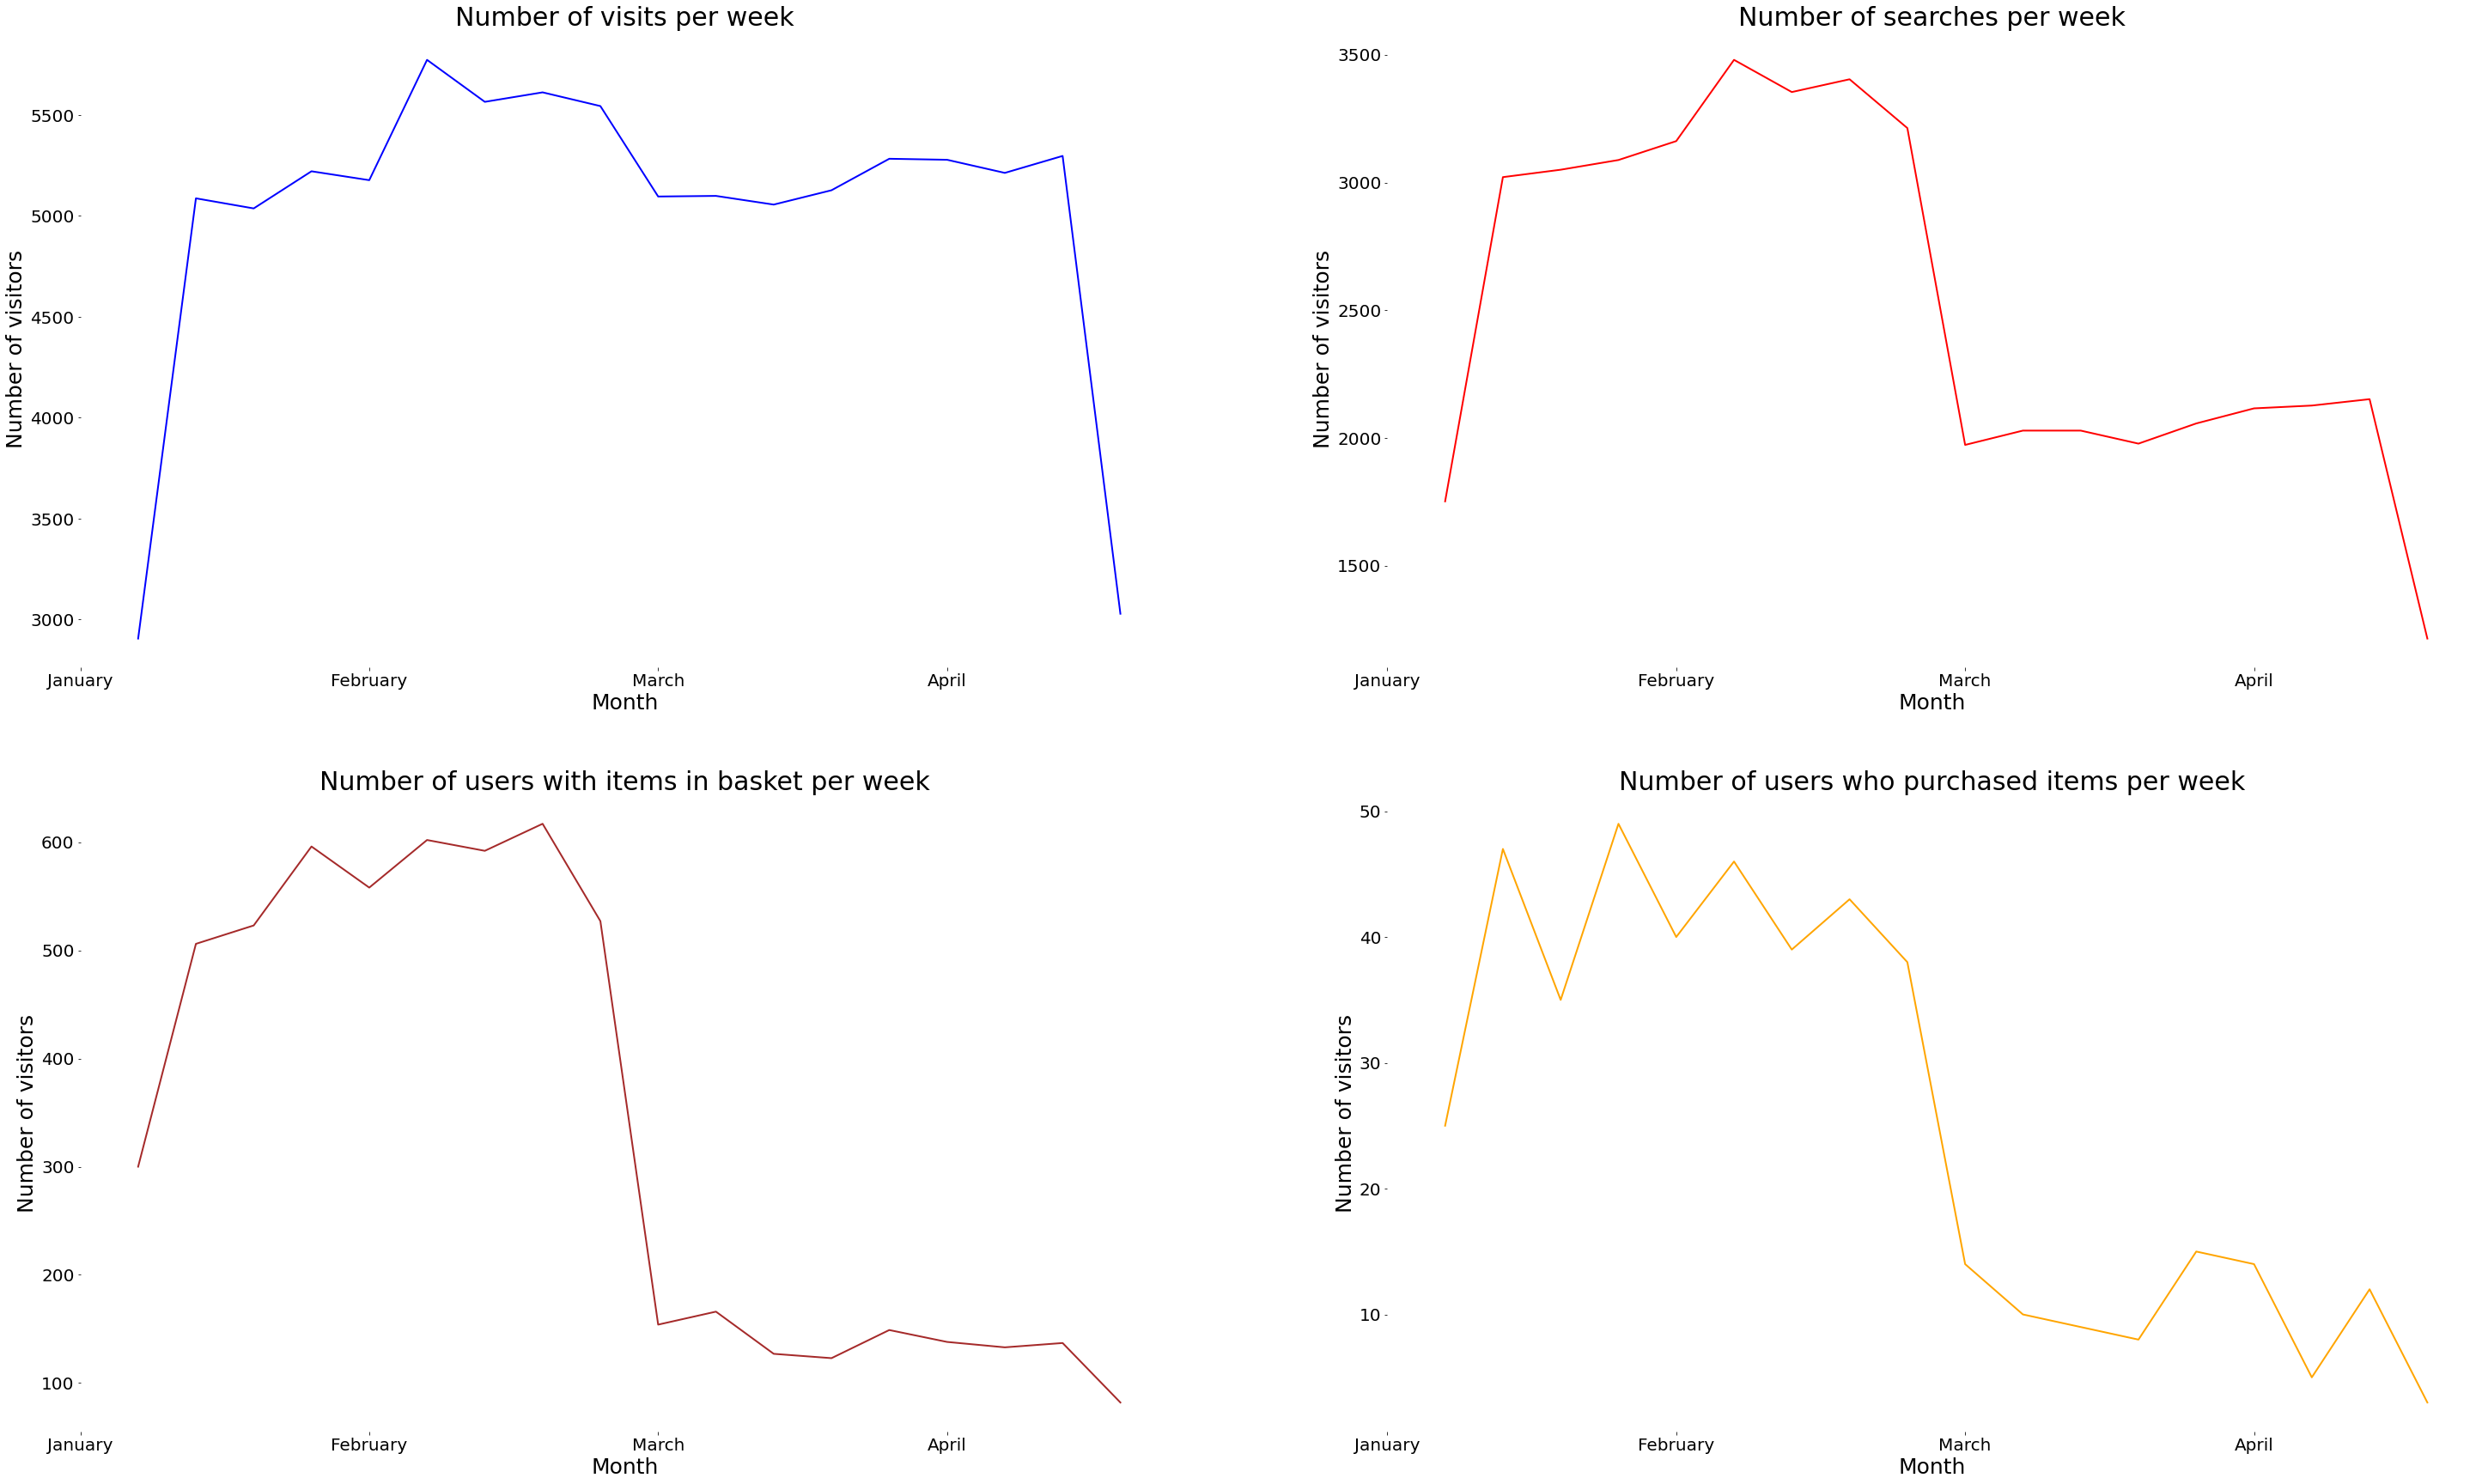

In [343]:
#Plotting the sum of all the page visits over time.
# ax 0,0 - 'Number of visits per week'
# ax 0,1 -'Number of searches per week'
# ax 1,0 - 'Number of users with items in basket per week'
# ax 1,1 - 'Number of users who purchased items per week'

# Setting up the figure
fig, ax = plt.subplots(2, 2, figsize=(50,30)) 

#Plotting 
ax[0,0].plot(funnel_week.week, funnel_week['page_home'], color='blue', linewidth=2)
ax[0,1].plot(funnel_week.week, funnel_week['page_search'], color='red', linewidth=2)
ax[1,0].plot(funnel_week.week, funnel_week['page_basket'], color='brown', linewidth=2)
ax[1,1].plot(funnel_week.week, funnel_week['page_confirmation'], color='orange', linewidth=2)

#Setting titles
ax[0,0].set_title('Number of visits per week', fontsize=30) #set the title and the size of the title
ax[0,1].set_title('Number of searches per week', fontsize=30) #set the title and the size of the title
ax[1,0].set_title('Number of users with items in basket per week', fontsize=30) #set the title and the size of the title
ax[1,1].set_title('Number of users who purchased items per week', fontsize=30) #set the title and the size of the title

#Setting the x ticks using the month list above
ax[0,0].set_xticks(np.arange(0,19,5))
ax[0,0].set_xticklabels(xlist)
ax[0,1].set_xticks(np.arange(0,19,5))
ax[0,1].set_xticklabels(xlist)
ax[1,0].set_xticks(np.arange(0,19,5))
ax[1,0].set_xticklabels(xlist)
ax[1,1].set_xticks(np.arange(0,19,5))
ax[1,1].set_xticklabels(xlist)

#Setting the x and y axis labesl
ax[0,0].set_ylabel('Number of visitors',fontsize=25)
ax[0,0].set_xlabel('Month',fontsize=25)
ax[0,1].set_ylabel('Number of visitors',fontsize=25)
ax[0,1].set_xlabel('Month',fontsize=25)
ax[1,0].set_ylabel('Number of visitors',fontsize=25)
ax[1,0].set_xlabel('Month',fontsize=25)
ax[1,1].set_ylabel('Number of visitors',fontsize=25)
ax[1,1].set_xlabel('Month',fontsize=25)

#Despining
for key, spine in ax[0,0].spines.items(): 
    spine.set_visible(False)
for key, spine in ax[0,1].spines.items(): 
    spine.set_visible(False)
for key, spine in ax[1,0].spines.items(): 
    spine.set_visible(False)
for key, spine in ax[1,1].spines.items(): 
    spine.set_visible(False)
    
#Setting size of the tick labels for visability    
ax[0,0].tick_params(axis='both', which='major', labelsize=20)
ax[0,1].tick_params(axis='both', which='major', labelsize=20)
ax[1,0].tick_params(axis='both', which='major', labelsize=20)
ax[1,1].tick_params(axis='both', which='major', labelsize=20)

#Showing the graphs
plt.show()

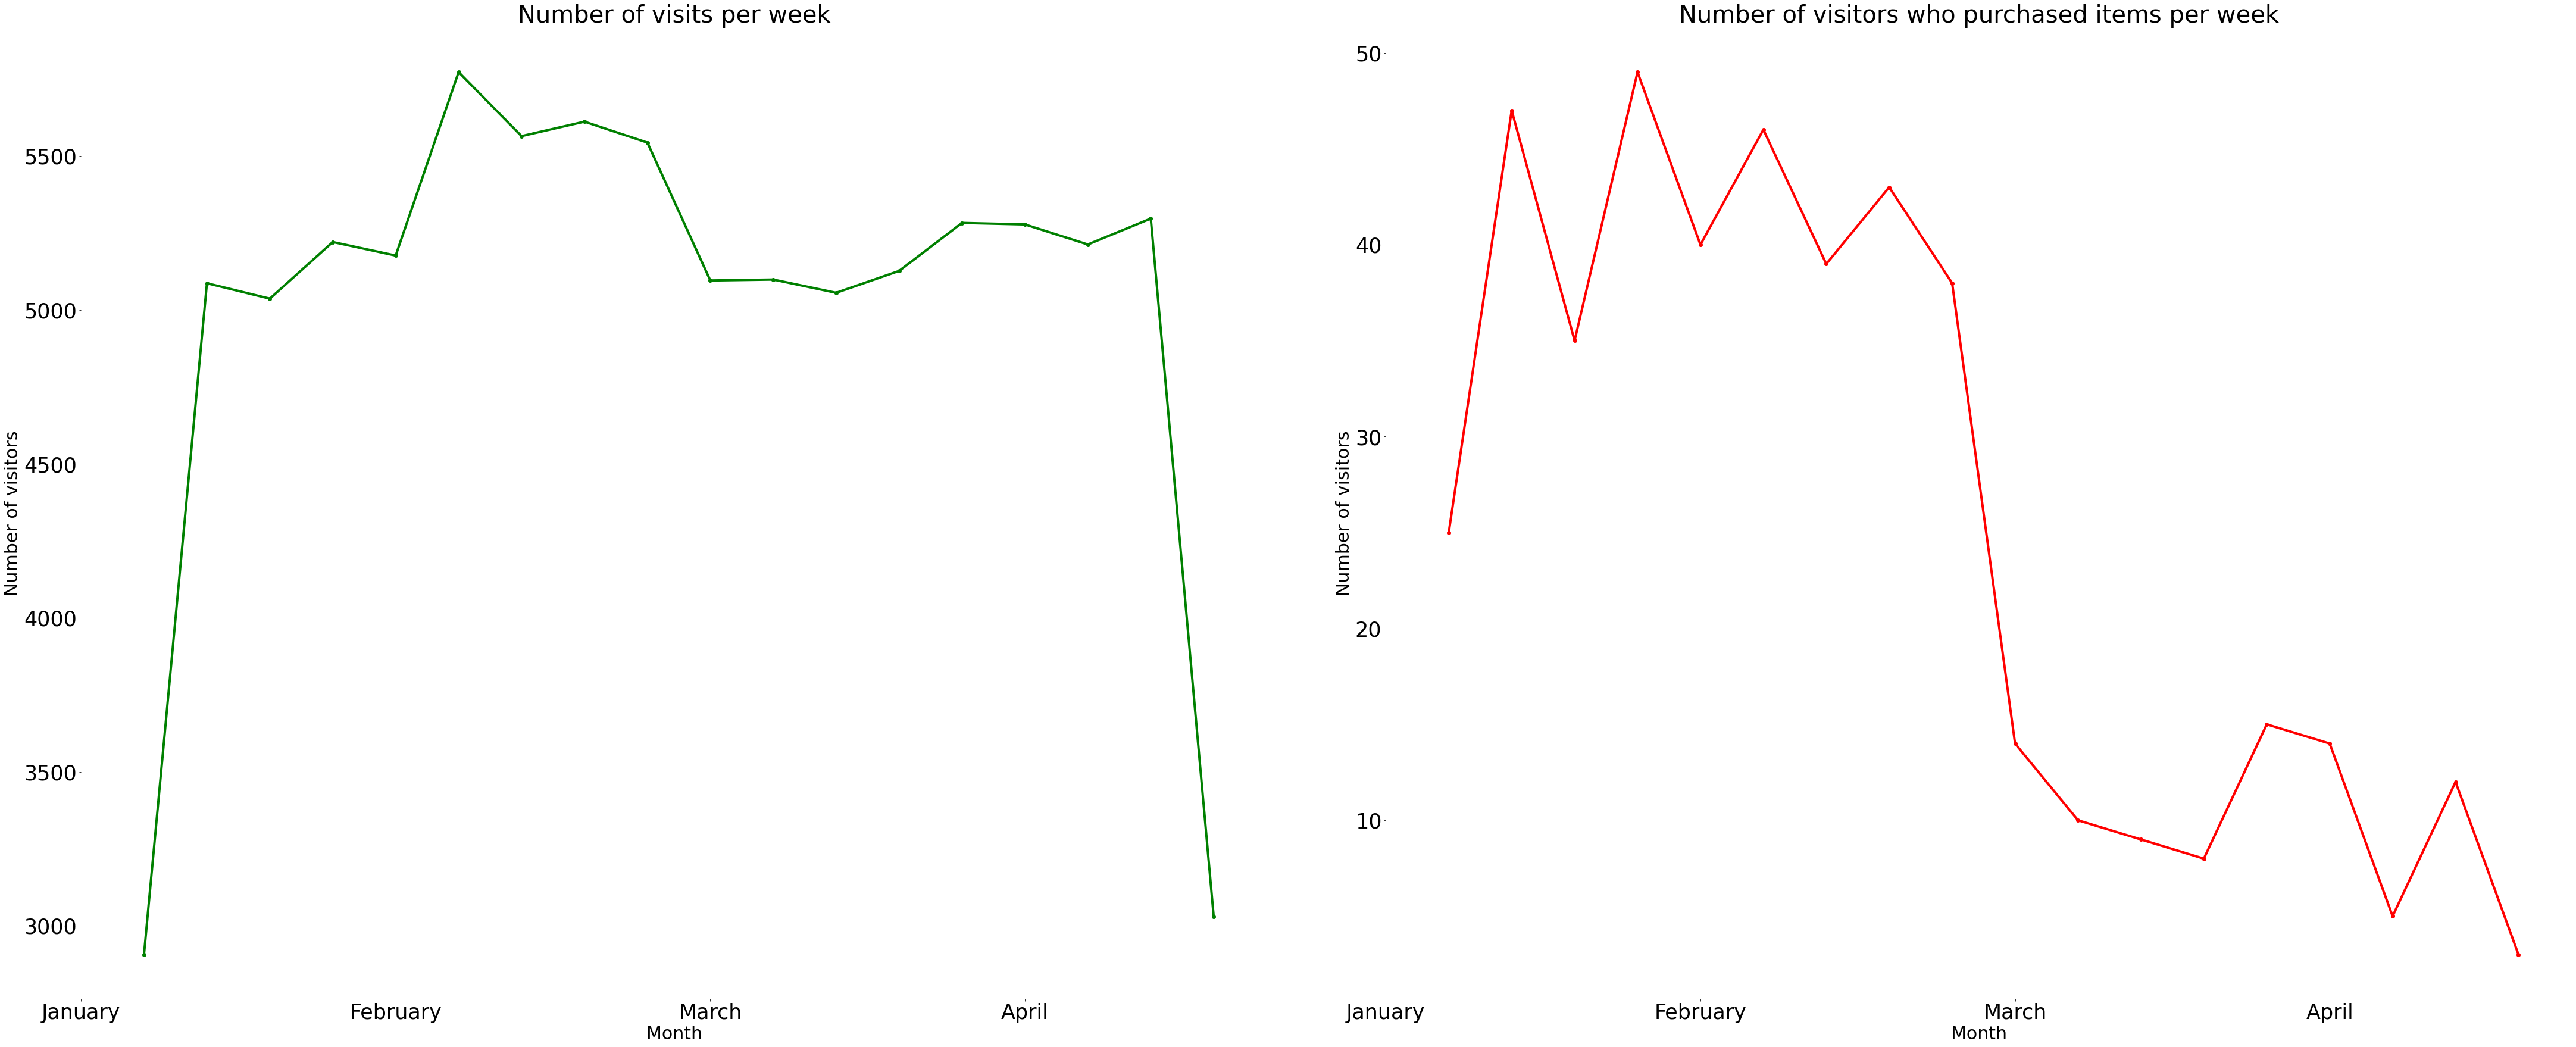

In [294]:
#Plotting for presentation, overall visitors and purchasing over time
# ax 0 - 'Number of visits per day'
# ax 1 - 'Number of users who purchased items per day'

#Setting up figure
fig, ax = plt.subplots(ncols=2,figsize=(75,30))

#Plotting
ax[0].plot(funnel_week.week, funnel_week['page_home'], color='green', linewidth=4, marker='o')
ax[1].plot(funnel_week.week, funnel_week['page_confirmation'], color='red', linewidth=4, marker='o')

#Titles
ax[0].set_title('Number of visits per week', fontsize=40) #set the title and the size of the title
ax[1].set_title('Number of visitors who purchased items per week', fontsize=40) #set the title and the size of the title

#Set x-ticks to the monthly list
ax[0].set_xticks(np.arange(0,19,5))
ax[0].set_xticklabels(xlist)
ax[1].set_xticks(np.arange(0,19,5))
ax[1].set_xticklabels(xlist)

#Naming x and y axis lables
ax[0].set_ylabel('Number of visitors',fontsize=30)
ax[0].set_xlabel('Month',fontsize=30)
ax[1].set_ylabel('Number of visitors',fontsize=30)
ax[1].set_xlabel('Month',fontsize=30)

#Despining
for key, spine in ax[0].spines.items(): #take away the spines in a for loop
    spine.set_visible(False)
for key, spine in ax[1].spines.items(): #take away the spines in a for loop
    spine.set_visible(False)
    
#Setting size of ticks for visability
ax[0].tick_params(axis='both', which='major', labelsize=35)
ax[1].tick_params(axis='both', which='major', labelsize=35)


#Creating some space
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.4)

#Showing graphs
plt.show()

So this is interesting. Although the visits to the site stay roughly the same througout the four months (except for a peak in febraury).
We can see here that something happened in March that drastically changes the behavioral pattern on the site.

## Let's compare the funnel before and after March 1st

(This analysis may a times refer to before and after March, this means before and after March 1st (Starting week 10))

Seeing the dramatic decline in the graph in the beginning of March, I got curious to see if I could find out more in detailed what happened. Becuase the shift is so stark, I assume that this was an internal change, probabily an update to the website, as an external factor would more likely have a gradual decline. 

Lets get a better sense on how the funnel was affected on March 1st.

In [193]:
#Creating a new data frame grouped by device, week and page they boounced on ('last_page')
last_page_sum=funnel.groupby(['week','device','last_page']).user_id.count().reset_index()
last_page_sum.head()

,week,device,last_page,user_id
0,1,Desktop,Basket,145
1,1,Desktop,Confirmation,6
2,1,Desktop,Home,970
3,1,Desktop,Search,837
4,1,Mobile,Basket,130


In [194]:
#Categorising for before and after March (week 10)
last_page_sum['March']=last_page_sum['week'].apply(lambda x:'Before' if x <10 else 'After')
last_page_sum

,week,device,last_page,user_id,March
0,1,Desktop,Basket,145,Before
1,1,Desktop,Confirmation,6,Before
2,1,Desktop,Home,970,Before
3,1,Desktop,Search,837,Before
4,1,Mobile,Basket,130,Before
...,...,...,...,...,...
138,18,Desktop,Search,966,After
139,18,Mobile,Basket,46,After
140,18,Mobile,Confirmation,3,After
141,18,Mobile,Home,837,After


In [195]:
#Grouping data for before and after March and bounce page, summing and sorting the values, dropping the 'week' column and renaming the 'user_id' to 'count'
last_page_sum=last_page_sum.groupby(['March','last_page']).sum().sort_values('user_id',ascending=False).drop(columns='week').rename(columns={'user_id':'count'}).reset_index()

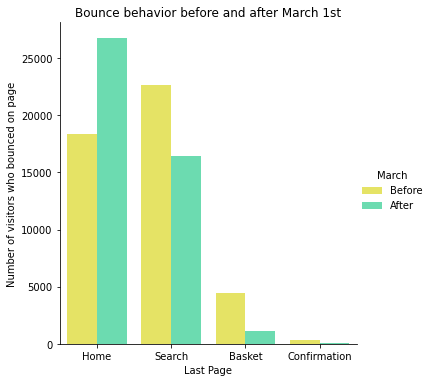

In [302]:
#Plotting the conversion funnel in a side by side bar graph, where the hues represent before and after March. 

#Setting the colors for the graph
colors = ["#FAF750", "#5AEDB4"]
sns.set_palette(sns.color_palette(colors))

#Plotting, ensuring that the funnel steps are plotted in order and that the 'Before' bar comes before the 'After' bar.
sns.catplot(data=last_page_sum,kind='bar', x='last_page', y='count',hue='March',order=['Home','Search','Basket','Confirmation']
           ,hue_order=['Before','After'])

#Setting titles and labels
plt.title("Bounce behavior before and after March 1st")
plt.xlabel('Last Page')
plt.ylabel('Number of visitors who bounced on page');

From this graph we see a drastic difference in behavior between before March 1st and after March 1st. Especially in the conversion from home to search. 

## Let's get a sense on the differences between devices

So we know there is a difference depending on time, let's explore the two devices, 'Desktop' and 'Mobile' further.

In [239]:
#Creating new dataframe grouped by week and device.
week_device=funnel.groupby(['week','device']).sum().reset_index()
week_device.head()

,week,device,user_id,page_home,page_search,page_basket,page_confirmation
0,1,Desktop,1003702411,1958,988,151,6
1,1,Mobile,483888648,948,764,149,19
2,2,Desktop,1695365338,3378,1684,244,14
3,2,Mobile,841950350,1709,1337,262,33
4,3,Desktop,1643307407,3321,1683,274,11


In [240]:
#Creating a copy for later
week_device1=week_device.copy()

In [241]:
#Calculating conversion between funnel steps into percentage
week_device['purchase_per_visitor']=round(100*week_device.page_confirmation/week_device.page_home,2)
week_device['search_per_visits']=round(100*week_device.page_search/week_device.page_home,2)
week_device['baskets_per_search']=round(100*week_device.page_basket/week_device.page_search,2)
week_device['purchase_per_basket']=round(100*week_device.page_confirmation/week_device.page_basket,2)


In [303]:
#Getting a sense of the new table
week_device.head()

,week,device,user_id,page_home,page_search,page_basket,page_confirmation,purchase_per_visitor,search_per_visits,baskets_per_search,purchase_per_basket
0,1,Desktop,1003702411,1958,988,151,6,0.31,50.46,15.28,3.97
1,1,Mobile,483888648,948,764,149,19,2.00,80.59,19.50,12.75
2,2,Desktop,1695365338,3378,1684,244,14,0.41,49.85,14.49,5.74
3,2,Mobile,841950350,1709,1337,262,33,1.93,78.23,19.60,12.60
4,3,Desktop,1643307407,3321,1683,274,11,0.33,50.68,16.28,4.01


In [304]:
#Funnel per device
week_device.groupby('device')[['page_home','page_search','page_basket','page_confirmation']].sum()

,page_home,page_search,page_basket,page_confirmation
device,,,,
Desktop,60200,30100,3010,150
Mobile,30200,15100,3020,302


This tables shows that there are more visitors to the desktop site but the mobile is doing a much better job at converting starting at the basket stage and all the way to payment confirmation.

Lets digg a bit deeper and see if there is more to find out

### EDA on the difference in step conversion per deivce
Creating visualizations to see the changes over time per device.


In [344]:
#Setting the color palette for coming graphs.
sns.set_palette("colorblind")

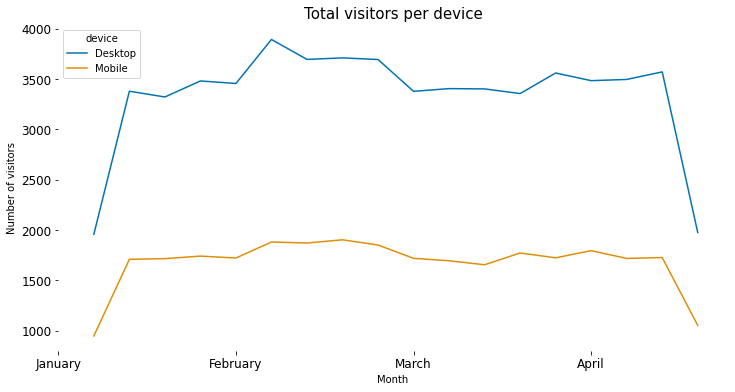

In [245]:
#Difference between devices on total visitors
fig, ax = plt.subplots(figsize=(12,6))

#Plotting the total amount of visitors per week. (Sum of page home is the total amount of )
sns.lineplot(data=week_device, x='week', y='page_home',hue='device')


ax.set_title('Total visitors per device', fontsize=15) #set the title and the size of the title

ax.set_xticks(np.arange(0,19,5))
ax.set_xticklabels(xlist)


ax.set_ylabel('Number of visitors',fontsize=10)
ax.set_xlabel('Month',fontsize=10)


for key, spine in ax.spines.items(): #take away the spines in a for loop
    spine.set_visible(False)

    
ax.tick_params(axis='both', which='major', labelsize=12)


plt.show()

We see that more people are visiting the site from their desktop. Change over time is similar between devices.


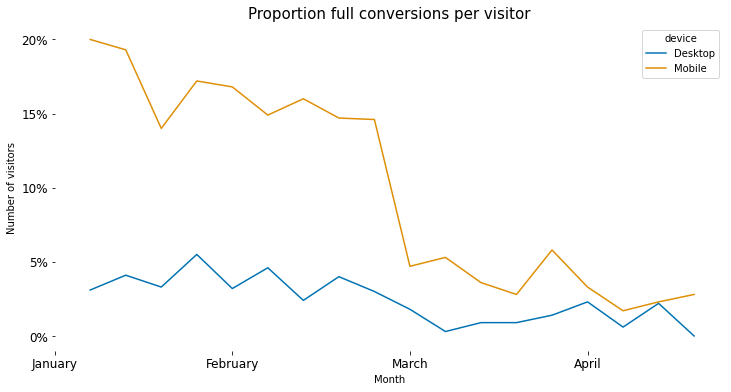

In [307]:
#Plotting difference between devices in full conversion rate over time 
fig, ax = plt.subplots(figsize=(12,6))

#Plotting purchase per visitor with Device as hue. 
sns.lineplot(data=week_device, x='week', y='purchase_per_visitor',hue='device')

#Set the title
ax.set_title('Proportion full conversions per visitor', fontsize=15) 

#Set the x ticks to the list above
ax.set_xticks(np.arange(0,19,5))
ax.set_xticklabels(xlist)

#Set the y ticks to percentage
ax.set_yticks(np.arange(0,2.1,0.5))
ax.set_yticklabels(['0%','5%','10%','15%','20%'])

#Name the x and y label
ax.set_ylabel('Number of visitors')
ax.set_xlabel('Month',fontsize=10)

#Despine
for key, spine in ax.spines.items(): #take away the spines in a for loop
    spine.set_visible(False)

#Set the size of the tick labels   
ax.tick_params(axis='both', which='major', labelsize=12)

#Show plot
plt.show()


We can see that the conversion for the Mobile platform, although generally higher, has a big, and bigger than Desktop, drop in purchase conversions in March.

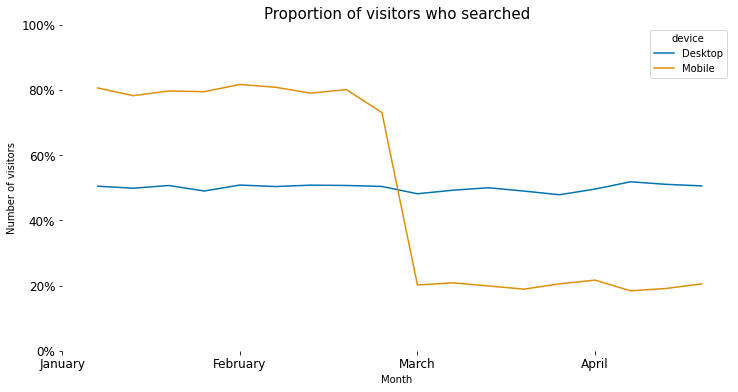

In [247]:
#Plotting the difference between devices in converting from visit to search
fig, ax = plt.subplots(figsize=(12,6))

#Plotting proportion of visitors who search, device as hue.
sns.lineplot(data=week_device, x='week', y='search_per_visits',hue='device')

#Setting the title.
ax.set_title('Proportion of visitors who searched', fontsize=15) #set the title and the size of the title

#Setting the X tick to the list of months
ax.set_xticks(np.arange(0,19,5))
ax.set_xticklabels(xlist)

#Set the y ticks to percentage
ax.set_yticks(np.arange(0,101,20))
ax.set_yticklabels(['0%','20%','40%','60%','80%','100%'])

#Name the x and y axis
ax.set_ylabel('Number of visitors')
ax.set_xlabel('Month',fontsize=10)

#Despine
for key, spine in ax.spines.items(): 
    spine.set_visible(False)

#Setting size of the tick labels
ax.tick_params(axis='both', which='major', labelsize=12)

#Show the graph
plt.show()

Finally some answers! Here we see clearly that the conversion to search on the mobile devices goes steeply down in March while desktop stays the same. Why this is I can only speculate, but maybe an update of the website made the search button hard to find?


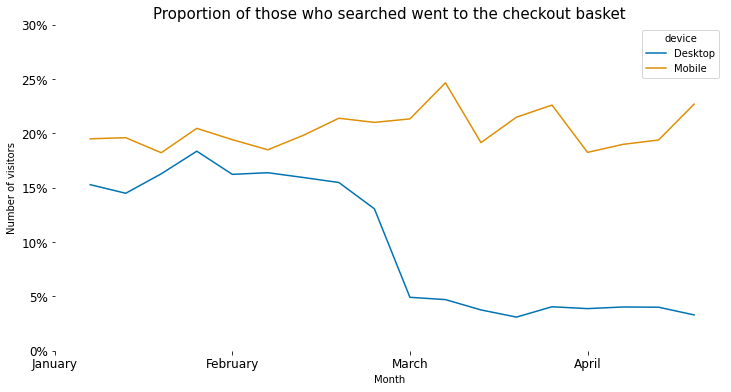

In [248]:
#Plotting the difference between devices in converting searches to clicking on a product (Basket).

#Setting up figure 
fig, ax = plt.subplots(figsize=(12,6))

#Plotting the amount of people from search move an item to basket
sns.lineplot(data=week_device, x='week', y='baskets_per_search',hue='device')

#Setting the title
ax.set_title('Proportion of those who searched went to the checkout basket', fontsize=15) #set the title and the size of the title

#Setting up the x ticks according to the monthly list.
ax.set_xticks(np.arange(0,19,5))
ax.set_xticklabels(xlist)

#Setting the y ticks to percentage. 
ax.set_yticks(np.arange(0,31,5))
ax.set_yticklabels(['0%','5%','10%','15%','20%','25%','30%'])

#Naming the x and y axis.
ax.set_ylabel('Number of visitors')
ax.set_xlabel('Month',fontsize=10)

#Despine
for key, spine in ax.spines.items(): #take away the spines in a for loop
    spine.set_visible(False)

#Set the tick labels size    
ax.tick_params(axis='both', which='major', labelsize=12)

#Show graph
plt.show()

Here we see that the basket conversion went up slightly for the mobile version in March, while for desktop it went down. 

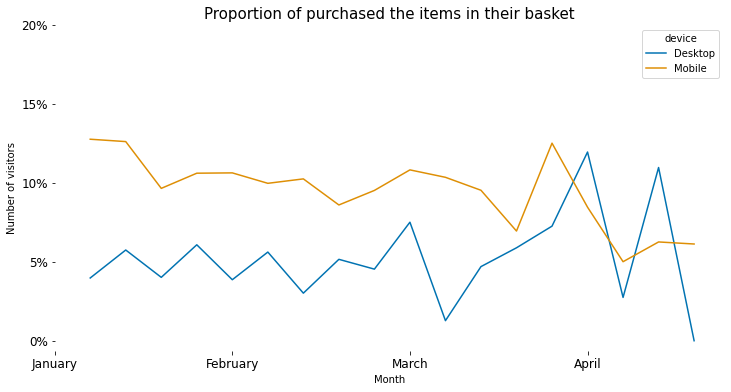

In [308]:
#Finally plotting conversion from basket to purchasing between devices
fig, ax = plt.subplots(figsize=(12,6))

#Plotting the amount of visitors with items in basket that actually purchase.
sns.lineplot(data=week_device, x='week', y='purchase_per_basket',hue='device')
ax.set_title('Proportion of purchased the items in their basket', fontsize=15) 

#Set x ticks to the names of the month
ax.set_xticks(np.arange(0,19,5))
ax.set_xticklabels(xlist)

#Set the y ticks to percentages
ax.set_yticks(np.arange(0,21,5))
ax.set_yticklabels(['0%','5%','10%','15%','20%'])

#Name the x and y axis
ax.set_ylabel('Number of visitors')
ax.set_xlabel('Month',fontsize=10)

#Despine
for key, spine in ax.spines.items():
    spine.set_visible(False)

#Set the size of the tick labels 
ax.tick_params(axis='both', which='major', labelsize=12)

#Show graph
plt.show()

So, for desktop this actually went up in March, and on the mobile there is no stark difference.

# Statistics and Probability

We have seen in our analysis that their is a difference in performance before and after March 1st, and between devices. We assume that this is due to an update/remodelling of the desktop and mobile platform. 

To ensure that the difference is significant, lets run one ANOVA test and if we can reject the null hypthesis that the distributions come from the same population, we will run a Tukey's range test to see which ones.

#### Distributions (situations) 
1. Mobile platform before March 1st.
2. Mobile platform after March 1st.
3. Desktop platfrom before March 1st.
4. Desktop platform after March 1st.

- H0: All the distributions come from the same 'population' meaning there is no statistically significant difference.
- H1: The distrubutions are significantly different.

In [250]:
#Importing necessary libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [255]:
#Calculating the proportions of conversion between funnel steps 
week_device1['purchase_per_visitor']=week_device1.page_confirmation/week_device1.page_home
week_device1['search_per_visits']=week_device1.page_search/week_device1.page_home
week_device1['baskets_per_search']=week_device1.page_basket/week_device1.page_search
week_device1['purchase_per_basket']=week_device1.page_confirmation/week_device1.page_basket

In [256]:
#Setting up a new column identifying before or after March
week_device1['March']=week_device1['week'].apply(lambda x:'Before' if x <10 else 'After')

In [257]:
#Setting up 4 new DataFrames, one per distribution situation.
mobile_before=week_device1[(week_device1['device']== 'Mobile') & (week_device1['March']=='Before')]
mobile_after=week_device1[(week_device1['device']== 'Mobile') & (week_device1['March']=='After')]
desktop_before=week_device1[(week_device1['device']== 'Desktop') & (week_device1['March']=='Before')]
desktop_after=week_device1[(week_device1['device']== 'Desktop') & (week_device1['March']=='After')]

In [258]:
#ANOVA test on the 4 different situations.
from scipy.stats import f_oneway

#P-value threshold= 0.05
fstat, pval= f_oneway(mobile_before['purchase_per_visitor'],mobile_after['purchase_per_visitor'],desktop_before['purchase_per_visitor'],desktop_after['purchase_per_visitor'])
print(pval)


3.74411833407057e-21


Since the number is much smaller than our threshold of 0.05 we can reject the null hypothesis, and deduct that there are differences between two or more steps that are statistically significant.

#### Tukey's range test to determine which ones are different


In [260]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

a=mobile_before['purchase_per_visitor']
b=mobile_after['purchase_per_visitor']
c=desktop_before['purchase_per_visitor']
d=desktop_after['purchase_per_visitor']

#P-Value threshold 0.05

v = np.concatenate([a, b, c,d])
labels = ['Mobile Before March'] * len(a) + ['Mobile After March'] * len(b) + ['Desktop Before March'] * len(c)+ ['Desktop After March'] * len(d)
tukey_results=pairwise_tukeyhsd(v,labels,0.05)
print(tukey_results)


              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1               group2        meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------------------
 Desktop After March Desktop Before March   0.0025 0.0034  0.0007 0.0044   True
 Desktop After March   Mobile After March   0.0025 0.0048  0.0006 0.0043   True
 Desktop After March  Mobile Before March   0.0153  0.001  0.0134 0.0171   True
Desktop Before March   Mobile After March  -0.0001    0.9 -0.0019 0.0017  False
Desktop Before March  Mobile Before March   0.0127  0.001  0.0109 0.0145   True
  Mobile After March  Mobile Before March   0.0128  0.001   0.011 0.0146   True
-------------------------------------------------------------------------------


In this table we can see that we can reject almost all, and only 'Desktop before' and 'Mobile after' can possibly be from the same, but what this shows is that the mobile's previosly better performance went down to the poor performance of the desktop. For the purpose of this analysis we will state even these samples are different as they happen at different times and cannot therefore be the same.

Conclusion: The differences in time and device is significant and therefore valid for our analysis. 

## Can we make some predictions on conversion rate based on the month and on what the device the visitor came to the site?

#### Pre processing the data for coming regression analysis.

In [262]:
#Get a sense of the "funnel" dataframe one more time
print(funnel.info())
funnel.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90400 entries, 0 to 90399
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            90400 non-null  int64         
 1   date               90400 non-null  datetime64[ns]
 2   device             90400 non-null  object        
 3   sex                90400 non-null  object        
 4   page_home          90400 non-null  int64         
 5   page_search        90400 non-null  int64         
 6   page_basket        90400 non-null  int64         
 7   page_confirmation  90400 non-null  int64         
 8   last_page          90400 non-null  object        
 9   week               90400 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 9.6+ MB
None


,user_id,date,device,sex,page_home,page_search,page_basket,page_confirmation,last_page,week
0,450007,2015-02-28,Desktop,Female,1,0,0,0,Home,9
1,756838,2015-01-13,Desktop,Male,1,0,0,0,Home,3
2,568983,2015-04-09,Desktop,Male,1,1,0,0,Search,15
3,190794,2015-02-18,Desktop,Female,1,1,0,0,Search,8
4,537909,2015-01-15,Desktop,Male,1,0,0,0,Home,3


In [263]:
#Changing March column to a binary where 0 = Before March 1st, and 1= After March 1st
funnel['March']=funnel['week'].apply(lambda x:'0' if x <10 else '1')
funnel

,user_id,date,device,sex,page_home,page_search,page_basket,page_confirmation,last_page,week,March
0,450007,2015-02-28,Desktop,Female,1,0,0,0,Home,9,0
1,756838,2015-01-13,Desktop,Male,1,0,0,0,Home,3,0
2,568983,2015-04-09,Desktop,Male,1,1,0,0,Search,15,1
3,190794,2015-02-18,Desktop,Female,1,1,0,0,Search,8,0
4,537909,2015-01-15,Desktop,Male,1,0,0,0,Home,3,0
...,...,...,...,...,...,...,...,...,...,...,...
90395,307667,2015-03-30,Desktop,Female,1,0,0,0,Home,14,1
90396,642989,2015-02-08,Desktop,Female,1,1,0,0,Search,6,0
90397,659645,2015-04-13,Desktop,Male,1,1,0,0,Search,16,1
90398,359779,2015-03-23,Desktop,Male,1,0,0,0,Home,13,1


In [264]:
#Changing device column to a binary where 0 = Desktop, and 1= Mobile
funnel['device']=funnel['device'].apply(lambda x:0 if x =='Desktop' else 1)

In [265]:
#Seeing the changes
funnel.head(100)

,user_id,date,device,sex,page_home,page_search,page_basket,page_confirmation,last_page,week,March
0,450007,2015-02-28,0,Female,1,0,0,0,Home,9,0
1,756838,2015-01-13,0,Male,1,0,0,0,Home,3,0
2,568983,2015-04-09,0,Male,1,1,0,0,Search,15,1
3,190794,2015-02-18,0,Female,1,1,0,0,Search,8,0
4,537909,2015-01-15,0,Male,1,0,0,0,Home,3,0
...,...,...,...,...,...,...,...,...,...,...,...
95,552008,2015-04-19,1,Male,1,0,0,0,Home,16,1
96,874797,2015-01-26,0,Female,1,1,0,0,Search,5,0
97,336186,2015-02-20,0,Male,1,0,0,0,Home,8,0
98,449714,2015-01-28,1,Male,1,1,0,0,Search,5,0


## Logistic Regression
Lets build a model to show that we can actually predict if a visitor will buy based on the device they were on and when they came to the site.

- We use a Logistic Regression analysis since we are working with the binary values:
   - Puchase = 1 or not= 0.
   - Desktop = 0 or Mobile = 1
   - Before = 0 of After = 1, March 1st

In [349]:
#Set features and label (I use 'week' to have more values and will make the cut of at week 10 which start with March 1)
features=funnel[['device','week']]
label=funnel['page_confirmation']

#Divide into train and test
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(features,label,test_size=0.3,random_state=100)

In [350]:
# Scale the feature data so it has mean = 0 and standard deviation = 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_features=scaler.fit_transform(X_train)
test_features=scaler.transform(X_test)

In [351]:
# Create and train the model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(train_features,y_train)

LogisticRegression()

In [352]:
# Score the model on the train data
score=model.score(train_features, y_train)
print(score)
# Score the model on the test data
score=model.score(test_features, y_test)
print(score)

0.9951801517067004
0.9945796460176991


This score is very high. THIS MODEL IS PERFECT! Or, should we should be sceptical? We know that only 0.05% of visitors of the site actually purchases, so by guessing that no one will purchase in all cases the machine will be right 99.5%  of the times (same as the score of the model). I would love to hear you thoughts here on whether this model can be considered good or lucky.

In [353]:
# Set up situations using out features

#[Type of device, week number]
mobile_before = np.array([1,1]) # Mobile the first week
mobile_after = np.array([1,18]) # Mobile the last week
desktop_before = np.array([0,1]) # Desktop the first week
desktop_after = np.array([0,18]) # Desktop the last week
a = np.array([1,9]) # Mobile week before March 1st
b = np.array([1,10]) # Mobile week of March 1st
c = np.array([0,9]) # Desktop week before March 1st
d = np.array([0,10]) # Desktop week of March 1st

# Combine the situations
sample_situations=np.array([mobile_before,mobile_after,desktop_before,desktop_after,a,b,c,d])
# Scale the features
sample_situations=scaler.transform(sample_situations)

In [354]:
# Make predictions on the probaility a visitor to the site purchases a product. 
predictions=model.predict_proba(sample_situations)
print(predictions)

#Left column represents probability of no purchase (0) and right column represents the proability of a visitor buying a product (1). 

[[9.78148551e-01 2.18514491e-02]
 [9.96701062e-01 3.29893767e-03]
 [9.94895372e-01 5.10462820e-03]
 [9.99240390e-01 7.59609601e-04]
 [9.90986361e-01 9.01363918e-03]
 [9.91936272e-01 8.06372848e-03]
 [9.97915329e-01 2.08467070e-03]
 [9.98136397e-01 1.86360254e-03]]


In [355]:
# Analyze the coefficients
print(list(zip(['device','month'],model.coef_[0])))

[('device', 0.6941005520531482), ('month', -0.5538734629890265)]


Text(0, 0.5, 'coefficient')

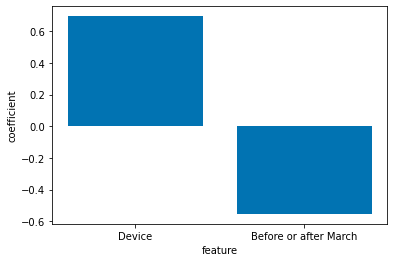

In [356]:
#Visually represent coefficients
coefficients=model.coef_
coefficients=coefficients.tolist()[0]

# Plot bar graph of coefficients
sns.set_palette('colorblind')
plt.bar([1,2],height=coefficients)
plt.xticks([1,2],['Device','Before or after March'])
plt.xlabel('feature')
plt.ylabel('coefficient')

This graph tells us that both device and timing have an effect on the probability of full conversion, from visit to buy.

'Device' is positive: Meaning that a 1(mobile) is positiviely associated with purchasing. 
'Before and after March' is negative: Meaning that 1 (After) has a negative association with purchasing. 

In [357]:
# Libraries to calculate the ROC curve
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve

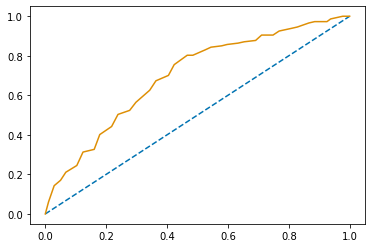

In [358]:
#Visualize ROC Curve

probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr)
# show the plot
plt.show()

In [359]:
#Again controlling the accuracy of the model by calculating the area under the curve. 

from sklearn.metrics import roc_auc_score
#probs = model.predict_proba(X_test)
# keep the predictions for class 1 only
#probs = probs[:, 1]
# calculate log loss
loss = roc_auc_score(y_test, probs)
print(loss)

0.697815981766599


Maybe it is a good model after all? Let me know what you think. 

# Thank you!

Thank you for reading! This is my first funnel analysis and I would be happy to receive advice and feedback for how it could be done differently, or if there is an aspect that you notice could have been explored further. 

Linnéa Mellander,
Feburary 8th, 2021.

Do you or your team have a funnel that need analysing give me a call! I'm open to internships!


https://www.linkedin.com/in/linn%C3%A9a-mellander-7a589a1b/